In [2]:
install.packages('Metrics')
install.packages('fabletools')
install.packages('fable')
install.packages('fUnitRoots')
install.packages('tsibble')
install.packages('tictoc')
install.packages('feasts')

library(Metrics)
library(dplyr)
library(tictoc)
library(lubridate)
library(tidyr)
library(ggplot2)
library(tsibble)
library(feasts)
library(reshape2)
#library(latex2exp)
library(fUnitRoots)
library(fable)
library(fabletools)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: fabletools


Attaching package: ‘fabletools’


The following object is masked from ‘package:Metrics’:

    accuracy



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
make_prediction <- function(df,fit) {
  df <- forecast(fit, df, point_forecast = list(.mean = mean)) %>% merge(df,by="chunk") %>% dplyr::transmute(chunk,truth=texts.y,preds=.mean)
  return(df)
}

In [4]:
df <- read.csv('../Data/Full_train_test_split/df_full_end_test.csv')
abnormals <- df$abnormal
df <- df %>% select(chunk, texts, temp_weighted, cloud_cover_weighted, rainfall_weighted, polarity, standardised_texts, daily_policy_index, train_test) %>% mutate(chunk=as.POSIXct(chunk, tz = "GMT", origin="1970-01-01"), hour = hour(chunk), weekday = weekdays(chunk), quarter = quarter(chunk))
ts <- as_tsibble(df, index = chunk)
ts$texts <- as.numeric(ts$texts)
ts$standardised_texts <- as.numeric(ts$standardised_texts)
ts$weekday <- as.factor(ts$weekday)
ts$hour <- as.factor(ts$hour)

In [20]:
df

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,daily_policy_index,train_test,hour,weekday,quarter
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>
2018-10-26 19:00:00,17,6.034263,21.525829,0.000000000,0.04321217,0.41711591,131.03,train,19,Friday,4
2018-10-26 20:00:00,15,5.561813,16.283735,0.000000000,0.04321217,-0.40451992,131.03,train,20,Friday,4
2018-10-26 21:00:00,15,5.399833,17.538188,0.000000000,0.04321217,-0.91450446,131.03,train,21,Friday,4
2018-10-26 22:00:00,19,4.787232,10.768733,0.000000000,0.04321217,-0.33752637,131.03,train,22,Friday,4
2018-10-26 23:00:00,21,4.534415,11.672903,0.000000000,0.04321217,1.04199641,131.03,train,23,Friday,4
2018-10-27 00:00:00,5,4.079211,14.185104,0.000000000,0.02031840,-0.89322604,112.53,train,0,Saturday,4
2018-10-27 01:00:00,8,4.028406,24.473330,0.000000000,0.02031840,0.63323779,112.53,train,1,Saturday,4
2018-10-27 02:00:00,3,3.646402,21.989287,0.000000000,0.02031840,-0.35856858,112.53,train,2,Saturday,4
2018-10-27 03:00:00,0,3.128456,14.128127,0.000000000,0.02031840,-1.64805080,112.53,train,3,Saturday,4


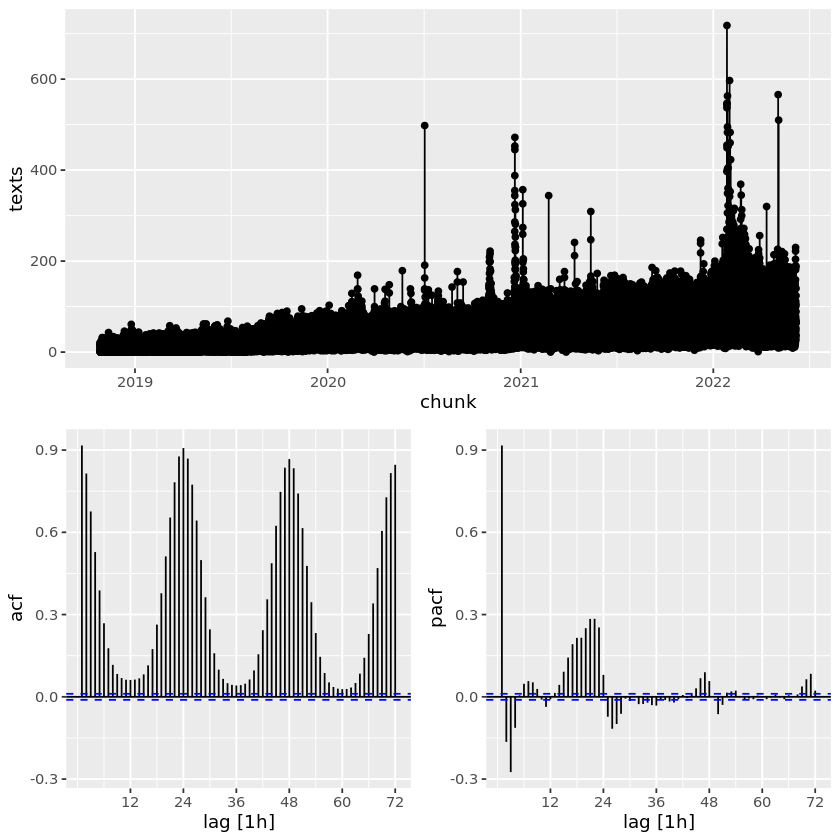

In [21]:
ts %>% gg_tsdisplay(texts, plot_type='partial', lag = 72)

In [22]:
tail(ts, n=1)

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,daily_policy_index,train_test,hour,weekday,quarter
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<int>
2022-06-06 20:00:00,188,14.23738,60.13144,0,0.1260588,1.293537,237.37,test,20,Monday,2


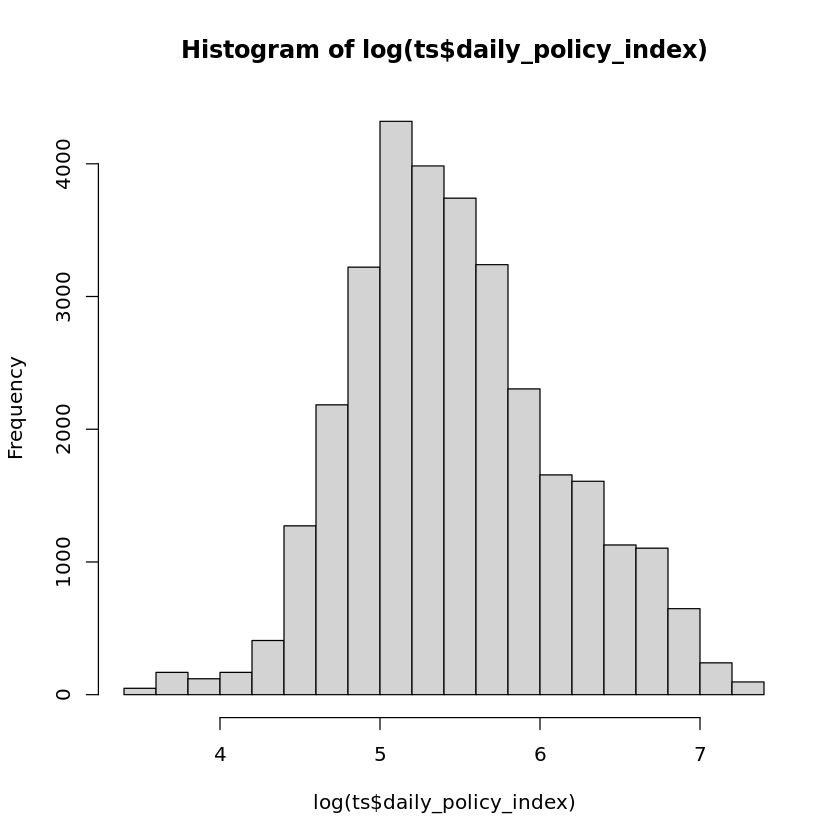

In [23]:
hist(log(ts$daily_policy_index))

In [5]:
train <- ts[ts$train_test == 'train',] %>% select(-train_test)
test <- ts[ts$train_test == 'test',] %>% select(-train_test)
#test <- tail(test, n=2000)

In [25]:
length(test$chunk)

[1] 1605

In [6]:
lambda <- train %>%
  features(texts, features = guerrero) %>%
  pull(lambda_guerrero)

In [27]:
tic("Train Time")
fit <- train %>% model(
  ARIMA(box_cox(texts,lambda) ~ hour + weekday + temp_weighted + cloud_cover_weighted +
        log(rainfall_weighted + 0.1) + polarity + log(daily_policy_index))
)
toc()

Train Time: 6698.833 sec elapsed


In [8]:
fit_2 <- train %>% model(
  ARIMA(box_cox(texts,lambda) ~ hour + weekday + temp_weighted + cloud_cover_weighted +
        log(rainfall_weighted + 0.1) + polarity + log(daily_policy_index) + pdq(p=0:3,d=1,q=0:5) + PDQ(P=0:2,D=0,Q=0:2))
)

In [28]:
fit

"ARIMA(box_cox(texts, lambda) ~ hour + weekday + temp_weighted + cloud_cover_weighted + log(rainfall_weighted + 0.1) + polarity + log(daily_policy_index))"
<model>
"<LM w/ ARIMA(0,1,4)(2,0,0)[24] errors>"


In [29]:
predictions <- make_prediction(test,fit)

In [30]:
predictions

chunk,truth,preds
<dttm>,<dbl>,<dbl>
2022-04-01 00:00:00,100,122.23744
2022-04-01 01:00:00,57,89.52830
2022-04-01 02:00:00,54,62.56009
2022-04-01 03:00:00,30,44.12323
2022-04-01 04:00:00,16,26.36254
2022-04-01 05:00:00,11,17.96736
2022-04-01 06:00:00,17,17.52988
2022-04-01 07:00:00,21,23.73977
2022-04-01 08:00:00,20,33.50764


In [34]:
errors <- summary(lm(box_cox(texts,lambda) ~ hour + weekday + temp_weighted + cloud_cover_weighted + rainfall_weighted + polarity, data=train))$residuals
errors_time <- seq(from=1,to=length(errors))
errors_time <- train$chunk[1:30053]

In [35]:
length(errors)

[1] 30053

In [36]:
errors <- cbind(errors_time,errors) %>% as.data.frame %>% mutate(errors_time=as.POSIXct(errors_time, origin='1970-01-01')) %>% as_tsibble(index=errors_time)
errors

errors_time,errors
<dttm>,<dbl>
2018-10-26 19:00:00,-1.2996199
2018-10-26 20:00:00,-1.6665249
2018-10-26 21:00:00,-1.8547809
2018-10-26 22:00:00,-1.5735873
2018-10-26 23:00:00,-1.2557883
2018-10-27 00:00:00,-2.5819238
2018-10-27 01:00:00,-1.5820686
2018-10-27 02:00:00,-2.2007892
2018-10-27 03:00:00,-13.2227561


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


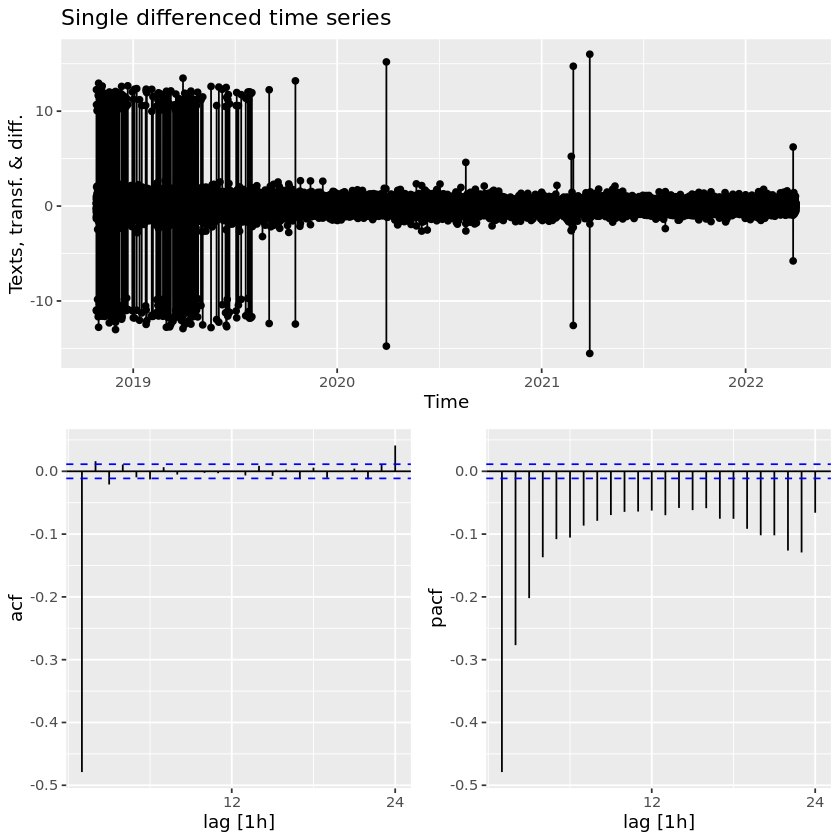

In [37]:
errors %>% gg_tsdisplay(difference(errors), plot_type='partial', lag=24) +
  labs(title="Single differenced time series", y="Texts, transf. & diff.",x="Time")

In [38]:
adfTest(errors$errors)
adfTest(difference(errors$errors))
adfTest(difference(errors$errors),lag=24)

Warning message in adfTest(errors$errors):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -53.5313
  P VALUE:
    0.01 

Description:
 Wed Aug 10 15:06:55 2022 by user: 


Warning message in adfTest(difference(errors$errors)):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -198.0794
  P VALUE:
    0.01 

Description:
 Wed Aug 10 15:06:55 2022 by user: 


Warning message in adfTest(difference(errors$errors), lag = 24):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 24
  STATISTIC:
    Dickey-Fuller: -73.8104
  P VALUE:
    0.01 

Description:
 Wed Aug 10 15:06:55 2022 by user: 


In [39]:
install.packages('tseries')
library(tseries)
kpss.test(difference(errors$errors))

also installing the dependency ‘quadprog’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in kpss.test(difference(errors$errors)):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  difference(errors$errors)
KPSS Level = 0.00033285, Truncation lag parameter = 16, p-value = 0.1


In [40]:
fit %>% pivot_longer(everything(), names_to = "Model name", values_to = "Orders")
# Check the coefficients of the model
coef <- tidy(fit) %>% dplyr::select(term, estimate, std.error, p.value)
head(coef)

# Check AICc: Lower is better
glance(fit) %>% arrange(AICc) %>% dplyr::select(.model:BIC)


Model name,Orders
<chr>,<model>
"ARIMA(box_cox(texts, lambda) ~ hour + weekday + temp_weighted + cloud_cover_weighted + log(rainfall_weighted + 0.1) + polarity + log(daily_policy_index))","<LM w/ ARIMA(0,1,4)(2,0,0)[24] errors>"


term,estimate,std.error,p.value
<chr>,<dbl>,<dbl>,<dbl>
ma1,-0.87280096,0.005950566,0.000000e+00
ma2,-0.01481176,0.007500658,4.830816e-02
ma3,-0.04611578,0.007628539,1.510131e-09
ma4,-0.05344064,0.005784718,2.665723e-20
sar1,0.13762420,0.005945763,1.680605e-117
sar2,0.02459287,0.005957494,3.668301e-05


.model,sigma2,log_lik,AIC,AICc,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"ARIMA(box_cox(texts, lambda) ~ hour + weekday + temp_weighted + cloud_cover_weighted + log(rainfall_weighted + 0.1) + polarity + log(daily_policy_index))",0.9038415,-41104.64,82291.28,82291.39,82632.02


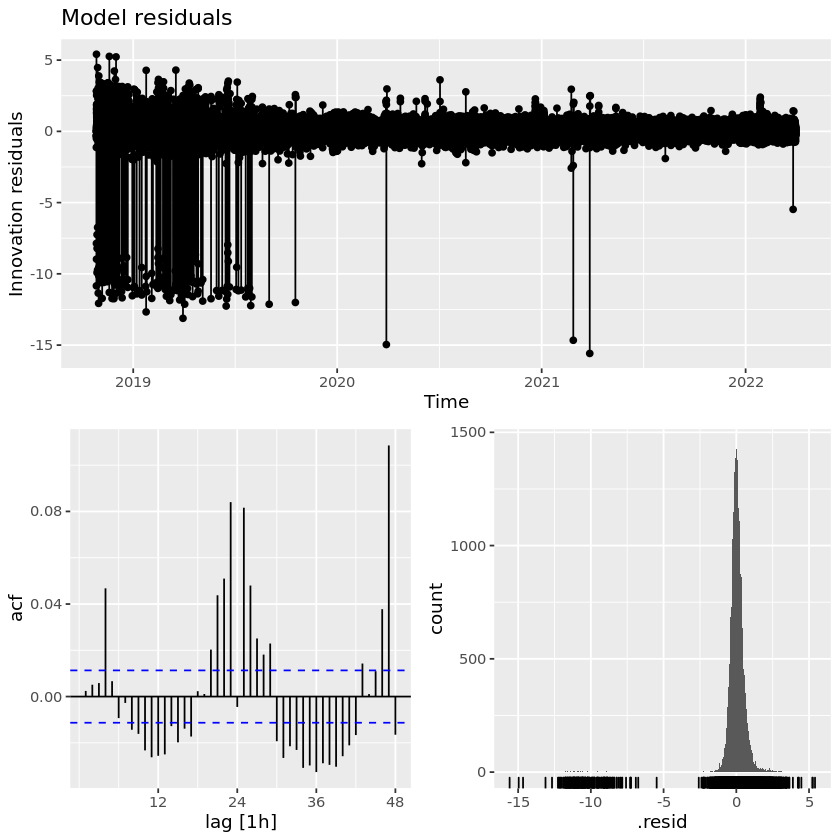

In [41]:
fit %>% gg_tsresiduals(lag=48) + labs(title="Model residuals", x="Time")

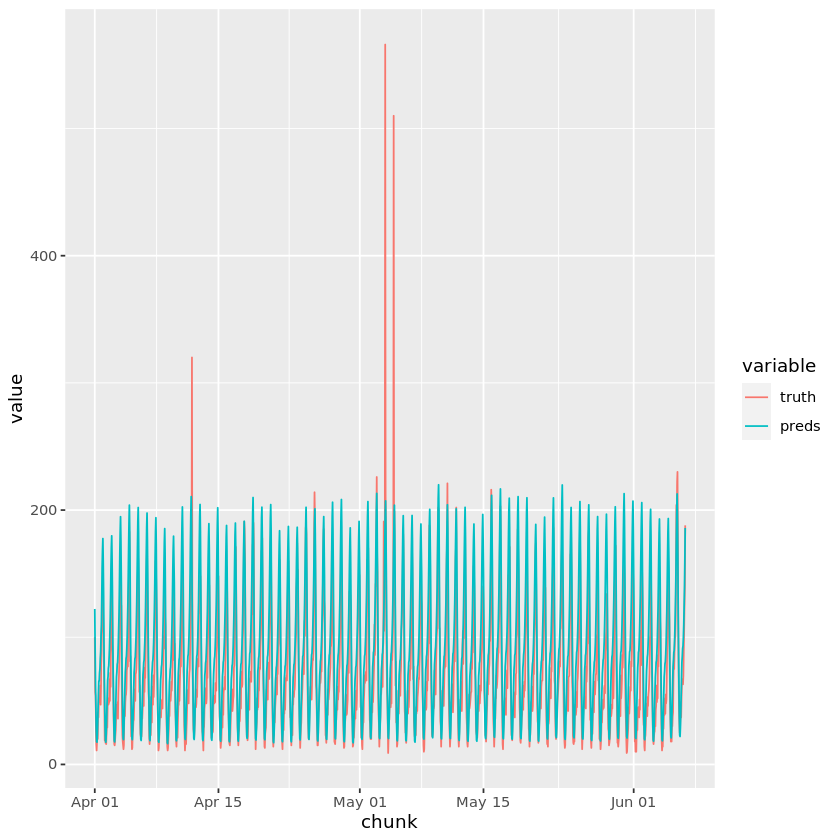

In [42]:
meltpred <- melt(predictions, id = 'chunk')
ggplot(meltpred,aes(x=chunk,y=value,colour=variable,group=variable)) + geom_line()

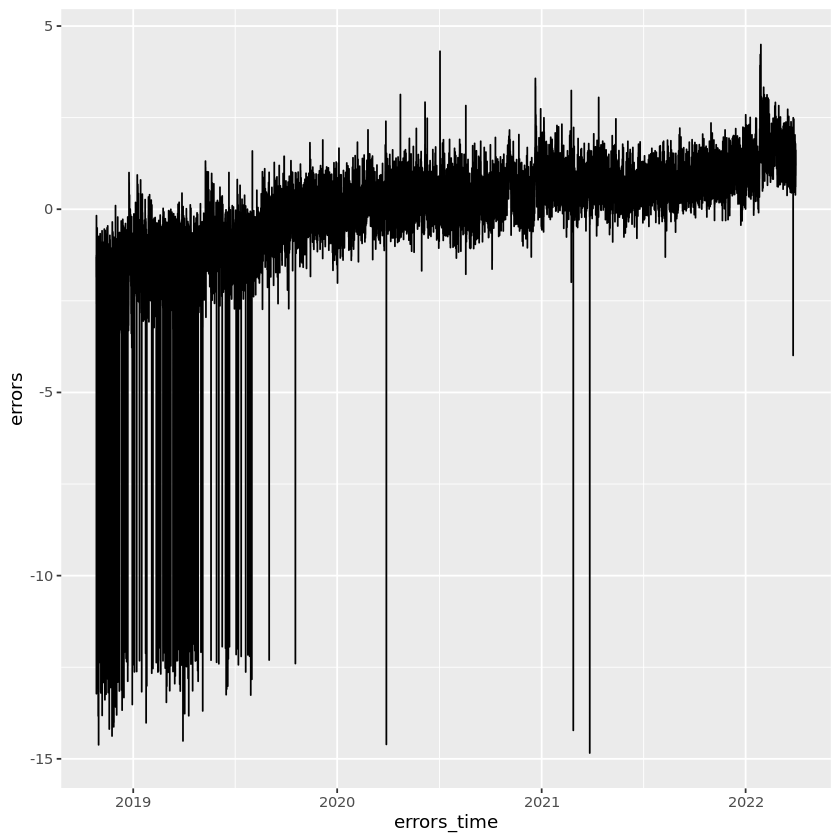

In [44]:
ggplot(errors, aes(x=errors_time,y=errors)) + geom_line()

In [45]:
write.csv(predictions, '../Data/ARIMA_preds.csv')

In [10]:
preds <- read.csv('../Data/ARIMA_preds.csv')
preds <- preds %>% mutate(chunk=as.POSIXct(chunk, tz = "GMT", origin="1970-01-01"), hour = hour(chunk), weekday = weekdays(chunk))

In [11]:
head(preds)

,X,chunk,truth,preds,hour,weekday
,<int>,<dttm>,<int>,<dbl>,<int>,<chr>
1,1,2022-04-01 00:00:00,100,122.23744,0,Friday
2,2,2022-04-01 01:00:00,57,89.52830,1,Friday
3,3,2022-04-01 02:00:00,54,62.56009,2,Friday
4,4,2022-04-01 03:00:00,30,44.12323,3,Friday
5,5,2022-04-01 04:00:00,16,26.36254,4,Friday
6,6,2022-04-01 05:00:00,11,17.96736,5,Friday


In [12]:
length(preds$preds)

[1] 1605

In [13]:
abnormals <- tail(abnormals, n=1605)

In [14]:
preds$abnormals <- abnormals

In [24]:
cutoffs <- read.csv('../Data/abnormal_cutoffs.csv')
cutoffs <- cutoffs %>% mutate(chunk=as.POSIXct(chunk, tz = "GMT", origin="1970-01-01"))
cutoffs <- cutoffs[order(cutoffs$chunk),]
cutoffs <- tail(cutoffs, n=1606)
cutoffs <- head(cutoffs, n=1605)

In [25]:
cutoffs

,X,chunk,cutoff
,<int>,<dttm>,<dbl>
30968,30082,2022-04-01 00:00:00,148.64020
30978,30083,2022-04-01 01:00:00,105.72684
30988,30084,2022-04-01 02:00:00,78.25289
30998,30085,2022-04-01 03:00:00,51.46981
31008,30086,2022-04-01 04:00:00,38.98148
31018,30087,2022-04-01 05:00:00,29.40466
31028,30088,2022-04-01 06:00:00,28.85476
31038,30089,2022-04-01 07:00:00,46.82776
31048,30090,2022-04-01 08:00:00,48.66424


In [16]:
cutoffs_q1 <- read.csv('../Data/Q1_22_cutoffs.csv') %>% select(-X)
head(cutoffs_q1)

,cutoff,hour,weekday
,<dbl>,<int>,<chr>
1,209.91404,0,Monday
2,151.39735,1,Monday
3,117.24117,2,Monday
4,72.25430,3,Monday
5,47.69524,4,Monday
6,42.04006,5,Monday


In [17]:
preds <- preds %>% left_join(cutoffs_q1, by=c('hour','weekday'))

In [26]:
preds$cutoffs_actual <- cutoffs$cutoff

In [27]:
preds

X,chunk,truth,preds,hour,weekday,abnormals,cutoff,abnormal_preds,cutoffs_actual
<int>,<dttm>,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,2022-04-01 00:00:00,100,122.23744,0,Friday,0,219.78876,0,148.64020
2,2022-04-01 01:00:00,57,89.52830,1,Friday,0,162.84453,0,105.72684
3,2022-04-01 02:00:00,54,62.56009,2,Friday,0,93.11755,0,78.25289
4,2022-04-01 03:00:00,30,44.12323,3,Friday,0,72.74863,0,51.46981
5,2022-04-01 04:00:00,16,26.36254,4,Friday,0,51.09984,0,38.98148
6,2022-04-01 05:00:00,11,17.96736,5,Friday,0,39.28578,0,29.40466
7,2022-04-01 06:00:00,17,17.52988,6,Friday,0,52.87445,0,28.85476
8,2022-04-01 07:00:00,21,23.73977,7,Friday,0,151.19341,0,46.82776
9,2022-04-01 08:00:00,20,33.50764,8,Friday,0,148.30025,0,48.66424


In [28]:
preds$abnormal_preds <- ifelse(preds$preds >= preds$cutoff, 1, 0)
preds$abnormal_preds_actual <- ifelse(preds$preds >= preds$cutoffs_actual, 1, 0)

In [29]:
head(preds)

,X,chunk,truth,preds,hour,weekday,abnormals,cutoff,abnormal_preds,cutoffs_actual,abnormal_preds_actual
,<int>,<dttm>,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2022-04-01 00:00:00,100,122.23744,0,Friday,0,219.78876,0,148.64020,0
2,2,2022-04-01 01:00:00,57,89.52830,1,Friday,0,162.84453,0,105.72684,0
3,3,2022-04-01 02:00:00,54,62.56009,2,Friday,0,93.11755,0,78.25289,0
4,4,2022-04-01 03:00:00,30,44.12323,3,Friday,0,72.74863,0,51.46981,0
5,5,2022-04-01 04:00:00,16,26.36254,4,Friday,0,51.09984,0,38.98148,0
6,6,2022-04-01 05:00:00,11,17.96736,5,Friday,0,39.28578,0,29.40466,0


In [31]:
#write.csv(preds, '../Data/ARIMA_preds_full.csv')

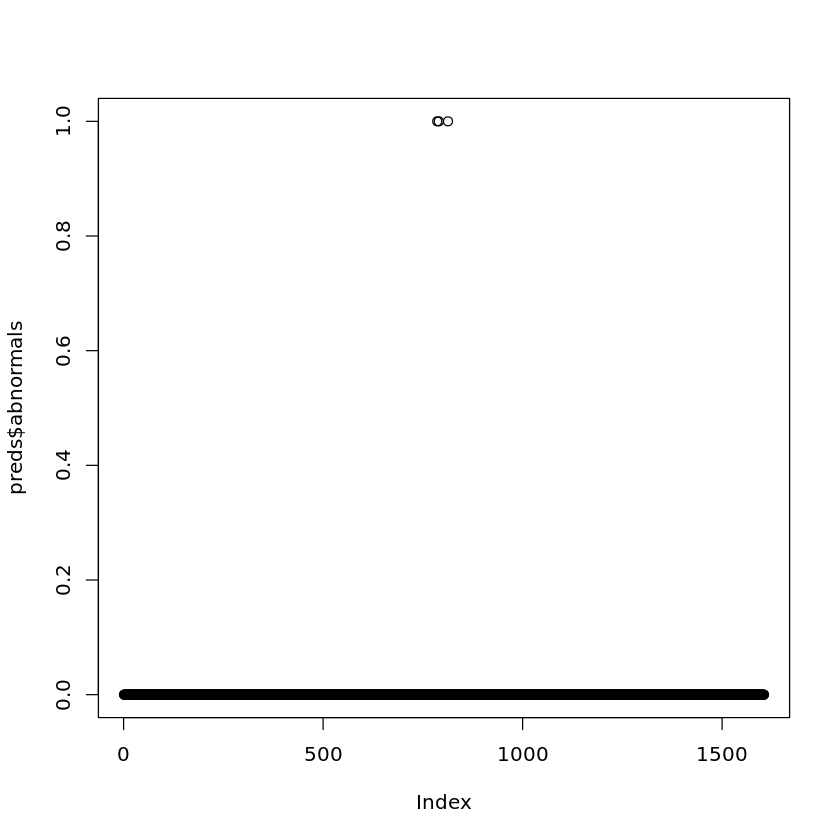

In [66]:
plot(preds$abnormals)

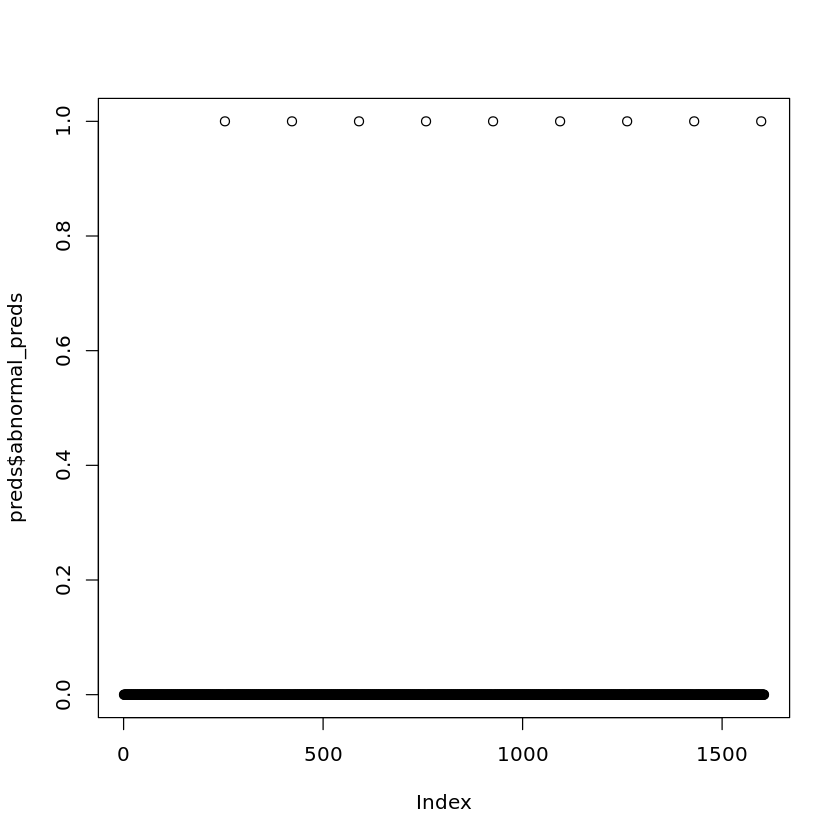

In [67]:
plot(preds$abnormal_preds)

In [68]:
cm = as.matrix(table(preds$abnormals, preds$abnormal_preds))
cm

   
       0    1
  0 1593    9
  1    3    0

In [69]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:fabletools’:

    MAE, RMSE


The following objects are masked from ‘package:Metrics’:

    precision, recall




In [70]:
cm1 = confusionMatrix(as.factor(preds$abnormals), as.factor(preds$abnormal_preds));
cm1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1593    9
         1    3    0
                                         
               Accuracy : 0.9925         
                 95% CI : (0.987, 0.9961)
    No Information Rate : 0.9944         
    P-Value [Acc > NIR] : 0.8764         
                                         
                  Kappa : -0.0028        
                                         
 Mcnemar's Test P-Value : 0.1489         
                                         
            Sensitivity : 0.9981         
            Specificity : 0.0000         
         Pos Pred Value : 0.9944         
         Neg Pred Value : 0.0000         
             Prevalence : 0.9944         
         Detection Rate : 0.9925         
   Detection Prevalence : 0.9981         
      Balanced Accuracy : 0.4991         
                                         
       'Positive' Class : 0              
                                         

In [71]:
 n = sum(cm) # number of instances
 nc = nrow(cm) # number of classes
 diag = diag(cm) # number of correctly classified instances per class 
 rowsums = apply(cm, 1, sum) # number of instances per class
 colsums = apply(cm, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of instances over the actual classes
 q = colsums / n # distribution of instances over the predicted classes

accuracy = sum(diag) / n  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.9925234,0.9981203,0.994382,0.9962477
1,0.9925234,0.0000000,0.000000,NaN


In [72]:
error_metrics <- function(truth, preds) {
  library(Metrics)
  mae <- Metrics::mae(truth,preds)
  my_mae <- mean(abs(preds-truth))
  rmse <- Metrics::rmse(truth,preds)
  my_rmse <- sqrt(mean((preds-truth)^2))
  me <- sum(preds-truth)/length(truth)
  sdae <- sd(abs(preds-truth))
  out <- cbind(mae,my_mae,rmse,my_rmse,me, sdae)
  return(out)
}

In [73]:
ARIMA_errors <- error_metrics(preds$truth, preds$preds)

In [74]:
ARIMA_errors

mae,my_mae,rmse,my_rmse,me,sdae
24.31611,24.31611,31.93576,31.93576,21.83483,20.70958
